**標題**

安裝套件

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install joblib
!pip install sklearn
!pip install flask
!pip install os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import 套件

In [ ]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

利用已取得的資料，讀取並存入讀取並存入data frame

In [ ]:
df = pd.read_csv("./1_f.csv")

Explore the data we have.

In [ ]:
df.info()
df.head()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ObsTime         854 non-null    int64  
 1   StnPres         854 non-null    object 
 2   SeaPres         854 non-null    object 
 3   StnPresMax      854 non-null    object 
 4   StnPresMaxTime  854 non-null    object 
 5   StnPresMin      854 non-null    object 
 6   StnPresMinTime  854 non-null    object 
 7   Temperature     854 non-null    object 
 8   T Max           854 non-null    object 
 9   T Max Time      854 non-null    object 
 10  T Min           854 non-null    object 
 11  T Min Time      854 non-null    object 
 12  Td dew point    854 non-null    object 
 13  RH              854 non-null    object 
 14  RHMin           854 non-null    object 
 15  RHMinTime       854 non-null    object 
 16  WS              854 non-null    object 
 17  WD              854 non-null    obj

,count,mean,std,min,25%,50%,75%,max
ObsTime,854.0,15.754098,8.812117,1.0,8.0,16.0,23.0,31.0
Precp,854.0,8.038642,21.628585,0.0,0.0,0.0,4.0,312.0


由上看出有些資料我們並不需要，因此我們加以整理，因此移除我們覺得不需要的變數

In [ ]:
df.drop(['ObsTime', 'SeaPres', 'StnPresMaxTime', 'StnPresMinTime'], axis = 1, inplace = True)
df.drop(['T Max Time', 'T Min Time', 'Td dew point'], axis = 1, inplace = True)
df.drop(['RHMinTime', 'WGustTime'], axis = 1, inplace = True)
df.drop(['PrecpHour', 'PrecpMax10', 'PrecpMax10Time', 'PrecpMax60', 'PrecpMax60Time'], axis = 1, inplace = True)
df.drop(['SunShine', 'SunShineRate', 'GloblRad', 'VisbMean'], axis = 1, inplace = True)
df.drop(['EvapA', 'UVI Max', 'UVI Max Time', 'Cloud Amount'], axis = 1, inplace = True) 

再觀察一下我們的資料

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StnPres      854 non-null    object 
 1   StnPresMax   854 non-null    object 
 2   StnPresMin   854 non-null    object 
 3   Temperature  854 non-null    object 
 4   T Max        854 non-null    object 
 5   T Min        854 non-null    object 
 6   RH           854 non-null    object 
 7   RHMin        854 non-null    object 
 8   WS           854 non-null    object 
 9   WD           854 non-null    object 
 10  WSGust       854 non-null    object 
 11  WDGust       854 non-null    object 
 12  Precp        854 non-null    float64
dtypes: float64(1), object(12)
memory usage: 86.9+ KB


首先我們看到幾乎所有資料的型態都為object並且都沒有缺失值，因此我們要對此處理，結果發現轉換不了，有些原始資料的缺失值會以「...」的方式補齊，所以我們要先把「...」先替代掉，再把data type轉換成轉換成float。

In [ ]:
df = df.replace('...','-999')
df = df.replace('/','-999')
for i in range(854):
    for j in range(0, 13):
        if df.iloc[i, j] == '-999':
            df.iloc[i, j] = 0.0
df = pd.DataFrame(df, dtype = np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


再觀察一下我們的資料

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StnPres      854 non-null    float64
 1   StnPresMax   854 non-null    float64
 2   StnPresMin   854 non-null    float64
 3   Temperature  854 non-null    float64
 4   T Max        854 non-null    float64
 5   T Min        854 non-null    float64
 6   RH           854 non-null    float64
 7   RHMin        854 non-null    float64
 8   WS           854 non-null    float64
 9   WD           854 non-null    float64
 10  WSGust       854 non-null    float64
 11  WDGust       854 non-null    float64
 12  Precp        854 non-null    float64
dtypes: float64(13)
memory usage: 86.9 KB


我們先處理降雨量，因為有降水及代表有下雨，所以只要大於大於0就轉換為1，反之轉換為0。

In [ ]:
for k in range(854):
    if df.iloc[k,12] > 0.0:
        df.iloc[k,12] = 1
    else:
        df.iloc[k,12] = 0

有些資料我們打算用平均值來填補，並取到小數點後第一位

In [ ]:
count0, count1, count2, count3, count4, count5, count8 , count10 = 0, 0, 0, 0 ,0, 0, 0, 0
stnprestotal , stnpresmaxtotal , stnpresmintotal, WStotal , WSGusttotal, Ttotal , Tmaxtotal , Tmintotal = 0 , 0 , 0, 0 , 0, 0 , 0 , 0

for k in range(0,853):
    if (df.iloc[k,0] != 0.0):
        stnpres = float(df.iloc[k,0])
        count0 += 1
        stnprestotal += stnpres
    if (df.iloc[k,1] != 0.0):
        stnpresmax = float(df.iloc[k,1])
        count1 += 1
        stnpresmaxtotal += stnpresmax
    if (df.iloc[k,2] != 0.0):
        stnpresmin = float(df.iloc[k,2])
        count2 += 1
        stnpresmintotal += stnpresmin
    if (df.iloc[k,3] != 0.0):
        T = float(df.iloc[k,3])
        count3 += 1
        Ttotal += T
    if (df.iloc[k,4] != 0.0):
        Tmax = float(df.iloc[k,4])
        count4 += 1
        Tmaxtotal += Tmax
    if (df.iloc[k,5] != 0.0):
        Tmin = float(df.iloc[k,5])
        count5 += 1
        Tmintotal += Tmin
    if (df.iloc[k,8] != 0.0):
        WS = float(df.iloc[k,8])
        count8 += 1
        WStotal += WS
    if (df.iloc[k,10] != 0.0):
        WSGust = float(df.iloc[k,10])
        count10 += 1
        WSGusttotal += WSGust

ave0 = round(stnprestotal / count0 , 1)
ave1 = round(stnpresmaxtotal / count1 , 1)
ave2 = round(stnpresmintotal / count2 , 1)
ave3 = round(Ttotal / count3 , 1)
ave4 = round(Tmaxtotal / count4 , 1)
ave5 = round(Tmintotal / count5 , 1)
ave8 = round(WStotal / count8 , 1)
ave10 = round(WSGusttotal / count10 , 1)

for c in range(854):
    if df.iloc[c,0] == 0.0:
        df.iloc[c,0] = ave0
    if df.iloc[c,1] == 0.0:
        df.iloc[c,1] = ave1
    if df.iloc[c,2] == 0.0:
        df.iloc[c,2] = ave2
    if df.iloc[c,3] == 0.0:
        df.iloc[c,3] = ave3
    if df.iloc[c,4] == 0.0:
        df.iloc[c,4] = ave4
    if df.iloc[c,5] == 0.0:
        df.iloc[c,5] = ave5
    if df.iloc[c,8] == 0.0:
        df.iloc[c,8] = ave8
    if df.iloc[c,10] == 0.0:
        df.iloc[c,10] = ave10

剩下的資料我們以眾數的方式來填補缺失值

In [ ]:
for i in range(854):
    if df.iloc[i,6] == 0.0:
            df.iloc[i,6] = df['RH'].value_counts().idxmax()

for i in range(854):
    if df.iloc[i,7] == 0.0:
            df.iloc[i,7] = df['RHMin'].value_counts().idxmax()           

for i in range(854):
    if df.iloc[i,9] == 0.0:
            df.iloc[i,9] = df['WD'].value_counts().idxmax()

for i in range(854):
    if df.iloc[i,11] == 0.0:
            df.iloc[i,11] = df['WDGust'].value_counts().idxmax()

接著我們看看，每個各別資料對雨量的關係圖

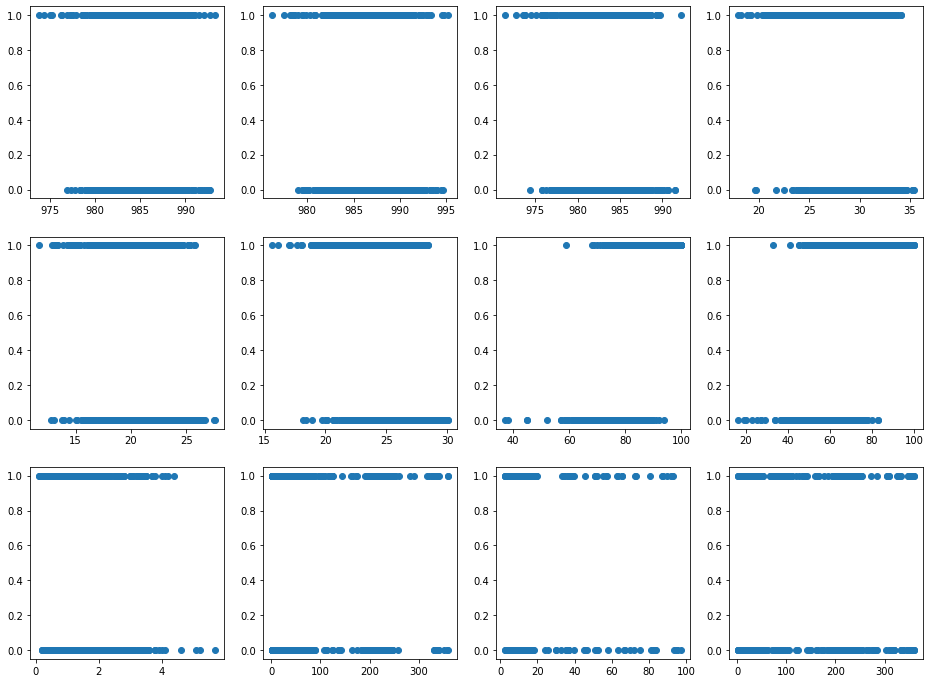

In [ ]:
x1 = df['StnPres']
x2 = df['StnPresMax']
x3 = df['StnPresMin']
x4 = df['T Max']
x5 = df['T Min']
x6 = df['Temperature']
x7 = df['RH']
x8 = df['RHMin']
x9 = df['WS']
x10 = df['WD']
x11 = df['WSGust']
x12 = df['WDGust']
y = df['Precp']

plt.figure(figsize=(16, 12))

plt.subplot(3, 4, 1)
plt.scatter(x1,y)
plt.subplot(3, 4, 2)
plt.scatter(x2,y)
plt.subplot(3, 4, 3)
plt.scatter(x3,y)
plt.subplot(3, 4, 4)
plt.scatter(x4,y)
plt.subplot(3, 4, 5)
plt.scatter(x5,y)
plt.subplot(3, 4, 6)
plt.scatter(x6,y)
plt.subplot(3, 4, 7)
plt.scatter(x7,y)
plt.subplot(3, 4, 8)
plt.scatter(x8,y)
plt.subplot(3, 4, 9)
plt.scatter(x9,y)
plt.subplot(3, 4, 10)
plt.scatter(x10,y)
plt.subplot(3, 4, 11)
plt.scatter(x11,y)
plt.subplot(3, 4, 12)
plt.scatter(x12,y)

plt.show()

接著我們看看，每個各別變數之間相關係數

In [69]:
df.corr()

,StnPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,RH,RHMin,WS,WD,WSGust,WDGust,Precp
StnPres,1.000000,0.973837,0.977780,-0.393330,-0.278551,-0.365425,-0.000452,0.002457,-0.095517,-0.206163,-0.129541,-0.190252,-0.102302
StnPresMax,0.973837,1.000000,0.942063,-0.401371,-0.286646,-0.389644,0.006529,0.006868,-0.062669,-0.182999,-0.106577,-0.185356,-0.068398
StnPresMin,0.977780,0.942063,1.000000,-0.360691,-0.258129,-0.332116,-0.012693,-0.009457,-0.106666,-0.195766,-0.130746,-0.187112,-0.114482
Temperature,-0.393330,-0.401371,-0.360691,1.000000,0.936330,0.800535,-0.429906,-0.462815,-0.133580,0.578848,0.086536,0.417973,-0.436195
T Max,-0.278551,-0.286646,-0.258129,0.936330,1.000000,0.691656,-0.521878,-0.640560,-0.126113,0.533895,0.103263,0.386055,-0.465951
T Min,-0.365425,-0.389644,-0.332116,0.800535,0.691656,1.000000,-0.152051,-0.159250,-0.100600,0.402647,0.094228,0.324419,-0.223502
RH,-0.000452,0.006529,-0.012693,-0.429906,-0.521878,-0.152051,1.000000,0.882385,-0.338862,-0.286190,-0.141324,-0.228729,0.635275
RHMin,0.002457,0.006868,-0.009457,-0.462815,-0.640560,-0.159250,0.882385,1.000000,-0.191886,-0.306964,-0.184937,-0.240991,0.534163
WS,-0.095517,-0.062669,-0.106666,-0.133580,-0.126113,-0.100600,-0.338862,-0.191886,1.000000,-0.056931,0.054401,-0.088445,-0.090684
WD,-0.206163,-0.182999,-0.195766,0.578848,0.533895,0.402647,-0.286190,-0.306964,-0.056931,1.000000,0.097587,0.430546,-0.252340


我們接著再把所有資料都餵給模型，來觀察模型辨識程度

In [ ]:
X = df.drop(['Precp'], axis=1)
y = df['Precp']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=67)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy_score(y_test, predictions)
recall_score(y_test, predictions)
precision_score(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7586206896551724

給模型之後發現分數沒有很理想，所以我們交叉測試，發現刪除刪除T Max 和 T Min後，分數會更高

In [ ]:
X = df.drop(['Precp', 'T Max', 'T Min'], axis=1)
y = df['Precp']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=67)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy_score(y_test, predictions)
recall_score(y_test, predictions)
precision_score(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7804878048780488

接著我們圖表化看出模型的矩陣關係


In [ ]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns = ['Predict not rain','Predict rain'], index=['True not rain', 'True rain'])

,Predict not rain,Predict rain
True not rain,150,18
True rain,25,64


最後我們測試模型的辨認是否順利，然後有發現到測出來的型態為[1.]、[0.]

In [ ]:
print(lr.predict([[900, 1000, 850, 23, 34, 12, 1, 23, 2, 45]]))
print(lr.predict([[900, 860, 950 , 26, 70 , 50 , 3 , 20 , 6 , 25 ]]))

[1.]
[0.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


利用joblib模組將模型匯出

In [ ]:
import joblib
joblib.dump(lr,'Precipitation_Predict.pkl',compress=3)

['Precipitation_Predict.pkl']